In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from pycm import ConfusionMatrix as cm

from sklearn import model_selection

from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

MODALIDADE = 'nao-supervisionado'

'internal-week1-umbalanced'

'Dados de Treinamento'

CLASS
0        22414
1         2409
dtype: int64

(24823, 5)

(24823, 1)

'Dados de Teste'

CLASS
0        5630
1         576
dtype: int64

(6206, 5)

(6206, 1)

'One Class SVM (RBF) - internal-week1-umbalanced'

/Users/marcos/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pycm/pycm_obj.py:939: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title(title)


'One Class SVM (Linear) - internal-week1-umbalanced'

/Users/marcos/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pycm/pycm_obj.py:939: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title(title)


'One Class SVM (Signmoid) - internal-week1-umbalanced'

/Users/marcos/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pycm/pycm_obj.py:939: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title(title)


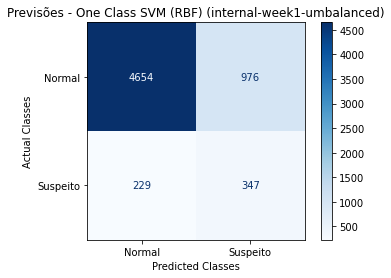

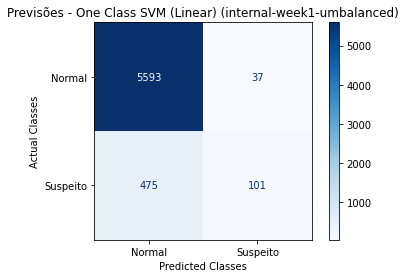

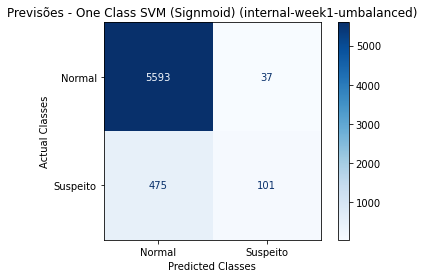

,Algoritmo,Acurácia,Precisão,AUC,F1 (Normal),F1 (Suspeito),MCC (Normal),MCC (Suspeito)
1,One Class SVM (Linear),0.917499,0.217552,0.584388,0.956232,0.282913,0.332133,0.332133
2,One Class SVM (Signmoid),0.917499,0.217552,0.584388,0.956232,0.282913,0.332133,0.332133
0,One Class SVM (RBF),0.805833,0.648940,0.714537,0.885380,0.365456,0.304000,0.304000


In [2]:
def plot_histogram(y, data, title, name):
    plt.subplots(figsize = (13, 5))
    sns.barplot(x = 'Algoritmo', y = y, data = data, palette = 'hot', edgecolor = sns.color_palette('dark', 7))
    plt.xticks(rotation = 90)
    plt.title(title)
    plt.savefig(f'./results/images/histograma-{name}.jpg', bbox_inches = 'tight', dpi = 150)
    plt.show()

random_seed = 42
random_state = np.random.RandomState(random_seed)

OUTLIERS_FRACTION = 0.125

models = [
#     ('EV', 'Covariancia', 'Elliptic Envelop', EllipticEnvelope(contamination = OUTLIERS_FRACTION, support_fraction = 1)), # baixo desempenho
#     ('LOF', 'Proximidade', 'Local Outlier Factor', LocalOutlierFactor(n_neighbors = 35, contamination = OUTLIERS_FRACTION, novelty = True)), # baixo desempenho
#     ('IF', 'Ensemble', 'Isolation Forest', IsolationForest(contamination = OUTLIERS_FRACTION, random_state= random_state)), # baixo desempenho
    ('OCSVMR', 'SVM', 'One Class SVM (RBF)', OneClassSVM(kernel = 'rbf', nu = OUTLIERS_FRACTION,)),
    ('OCSVML', 'SVM', 'One Class SVM (Linear)', OneClassSVM(kernel = 'linear', nu = OUTLIERS_FRACTION,)),
#     ('OCSVMP', 'SVM', 'One Class SVM (Poly)', OneClassSVM(kernel = 'poly', nu = OUTLIERS_FRACTION,)), # baixo desempenho
    ('OCSVMS', 'SVM', 'One Class SVM (Sigmoid)', OneClassSVM(kernel = 'sigmoid', nu = OUTLIERS_FRACTION,)),
]

data_sets = [
    ('internal-week1-umbalanced'),
#     ('internal-week2-umbalanced'),

#     ('internal-week1-upsample'),
#     ('internal-week2-upsample'),

#     ('internal-week1-downsample'),
#     ('internal-week2-downsample'),

#     ('internal-week3'), # não tem classes variadas (só 1=normal)
#     ('internal-week4'), # não tem classes variadas (só 1=normal)
    
#     ('external-week1-umbalanced'),
#     ('external-week2-umbalanced'),
#     ('external-week3-umbalanced'),
#     ('external-week4-umbalanced'),
    
#     ('external-week1-upsample'),
#     ('external-week2-upsample'),
#     ('external-week3-upsample'),
#     ('external-week4-upsample'),
    
#     ('external-week1-downsample'),
#     ('external-week2-downsample'),
#     ('external-week3-downsample'),
#     ('external-week4-downsample'),
]

for data_set in data_sets:
    display(f'{data_set}')
    
    X_train = pd.read_csv(f'./results/data/CIDDS-001-{data_set}-pre-processed-train-data.csv')
    y_train = pd.read_csv(f'./results/data/CIDDS-001-{data_set}-pre-processed-train-class.csv')
    X_test = pd.read_csv(f'./results/data/CIDDS-001-{data_set}-pre-processed-test-data.csv')
    y_test = pd.read_csv(f'./results/data/CIDDS-001-{data_set}-pre-processed-test-class.csv')
    
    display('Dados de Treinamento')
    display(y_train.value_counts())
    display(X_train.shape)   
    display(y_train.shape)
    display('Dados de Teste')
    display(y_test.value_counts())
    display(X_test.shape)
    display(y_test.shape)
    
    compare = pd.DataFrame(columns = [])
    row_index = 0
    for prefix, group, name, model in models:
        display(f'{name} - {data_set}')
        
        y_pred = model.fit(X_train).predict(X_test)
        
        file = f'./results/reports/CIDDS-001-{data_set}-pos-processed-{prefix}.pkl'
        with open(file, "wb") as f:
            pickle.dump(model, f)
            
        # Traduzir as previsões do sklearn para ficarem iguais aos do modelo supervisionado e poder comparar
        # com os valores pré-classificados em y_test
        y_pred = np.where(y_pred == 1, 0, y_pred)
        y_pred = np.where(y_pred == -1, 1, y_pred)
        # Testar inverter a previsão para quando o AUC for menor que 0.5
        # Algoritmo	Acurácia	Precisão	F1 (macro)	F1 (micro)	Fbeta 2.0 (Normal)	Fbeta 2.0 (Suspeito)	Fbeta 0.5 (Normal)	Fbeta 0.5 (Suspeito)	Recall (Normal)	Recall (Suspeito)	AUC
        # Local Outlier Factor	0.623529	0.005574	0.554077	0.623529	0.276629	0.868296	0.597098	0.629796	0.234649	0.993737	0.614193
#         y_pred = np.where(y_pred == -1, 0, y_pred)

        confusion_matrix = cm(actual_vector = np.squeeze(y_test.values), predict_vector = y_pred)
        confusion_matrix.relabel(mapping={0: 'Normal', 1: 'Suspeito'})        
        confusion_matrix.save_csv(f'./results/reports/matriz-confusao-{data_set}-{prefix}')
        confusion_matrix.plot(cmap = plt.cm.Blues, number_label = True, title = f'Previsões - {name} ({data_set})', plot_lib = 'matplotlib')
        plt.savefig(f'./results/images/matriz-confusao-{data_set}-{prefix}.jpg', bbox_inches = 'tight', dpi = 150)

        compare.loc[row_index, 'Algoritmo'] = name
#         compare.loc[row_index, 'Prefixo'] = prefix
#         compare.loc[row_index, 'Grupo'] = group
#         compare.loc[row_index, 'Dados'] = data_set
        compare.loc[row_index, 'Acurácia'] = confusion_matrix.ACC['Normal']

        compare.loc[row_index, 'Precisão'] = confusion_matrix.OP['Normal']

#         compare.loc[row_index, 'F1 (macro)'] = confusion_matrix.F1_Macro
#         compare.loc[row_index, 'F1 (micro)'] = confusion_matrix.F1_Micro

        # Dois valores geralmentos usados para β são 2, que pesa o recall mais que a precisão,
        # e 0.5, que pesa recall menos que a precisão.
#         compare.loc[row_index, 'Fbeta 2.0 (Normal)'] = confusion_matrix.F_beta(beta = 2.0)['Normal']
#         compare.loc[row_index, 'Fbeta 2.0 (Suspeito)'] = confusion_matrix.F_beta(beta = 2.0)['Suspeito']
#         compare.loc[row_index, 'Fbeta 0.5 (Normal)'] = confusion_matrix.F_beta(beta = 0.5)['Normal']
#         compare.loc[row_index, 'Fbeta 0.5 (Suspeito)'] = confusion_matrix.F_beta(beta = 0.5)['Suspeito']

#         compare.loc[row_index, 'Recall (Normal)'] = confusion_matrix.TPR['Normal']
#         compare.loc[row_index, 'Recall (Suspeito)'] = confusion_matrix.TPR['Suspeito']

        compare.loc[row_index, 'AUC'] = confusion_matrix.AUC['Normal']
        
        compare.loc[row_index, 'F1 (Normal)'] = confusion_matrix.F1['Normal']
        compare.loc[row_index, 'F1 (Suspeito)'] = confusion_matrix.F1['Suspeito']

        compare.loc[row_index, 'MCC (Normal)'] = confusion_matrix.MCC['Normal']
        compare.loc[row_index, 'MCC (Suspeito)'] = confusion_matrix.MCC['Suspeito']

        row_index += 1

    plt.show()

#     results = []
#     names = []

#     for prefix, group, name, model in models:
#         kfold = model_selection.KFold(n_splits = 10)
#         selection = model_selection.cross_val_score(model, X_train, np.ravel(y_train), cv = kfold, scoring = 'accuracy')
#         results.append(selection)
#         names.append(name)
        
#     fig = plt.figure()
#     fig.suptitle(f'Comparativo entre Algorítmos ({data_set})')
#     ax = fig.add_subplot(111)
#     plt.boxplot(results)
#     ax.set_xticklabels(names, rotation = 90, ha = 'right')
#     plt.savefig(f'./results/images/comparativo-{MODALIDADE}-{data_set}.jpg', bbox_inches = 'tight', dpi = 150)
#     plt.show()

    compare.sort_values(by = ['Acurácia'], ascending = False, inplace = True) 
    display(compare)

#     plot_histogram(y = 'Acurácia', data = compare, title = f'Acurácia das previsões ({data_set})', name = f'{MODALIDADE}-acuracia-{data_set}')
#     plot_histogram(y = 'Precisão', data = compare, title = f'Precisão das previsões ({data_set})', name = f'{MODALIDADE}-precisao')
#     plot_histogram(y = 'Recall (Normal)', data = compare, title = f'Recall dos diferentes algoritmos (Normal - {data_set})', name = f'{MODALIDADE}-recall-inliers-{data_set}')
#     plot_histogram(y = 'Recall (Suspeito)', data = compare, title = f'Recall dos diferentes algoritmos (Suspeito - {data_set})', name = f'{MODALIDADE}-recall-outliers-{data_set}')
#     plot_histogram(y = 'AUC', data = compare, title = f'Comparativo AUC ({data_set})', name = f'{MODALIDADE}-auc')
    
    compare.to_latex(f'./results/reports/comparativo-{MODALIDADE}-{data_set}.tex', index = False)
    compare.to_csv(f'./results/reports/comparativo-{MODALIDADE}-{data_set}.csv', index = False)

> End